# Clustering by fast search and find of density peaks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [9]:
rand = np.random.RandomState(0)
n_samples = 1500
random_state = 0

In [24]:
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05, random_state=0)

blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

no_structure = rand.rand(n_samples, 2), None

varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

In [38]:
datasets = [noisy_circles, noisy_moons, blobs, no_structure, varied, aniso]

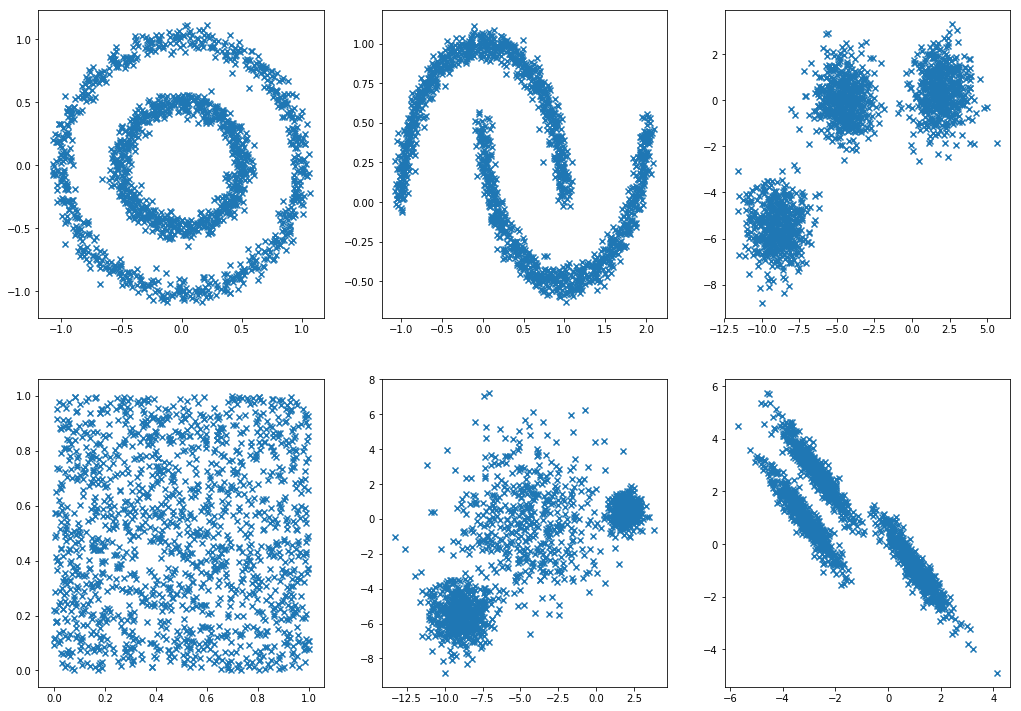

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(left=0.05, right=0.95, top=0.97, bottom=0.03, hspace=0.2, wspace=0.2)

i = 0
for X, y in datasets:
    axes[i // 3][i % 3].scatter(X[:, 0], X[:, 1], marker='x')
    i += 1

In [ ]:
class DPC(object):
    """
    1. 读取点
    2. 计算距离
    3. 计算截断距离 dc
    4. 计算局部密度 rho
    5. 计算 delta
    6. 确定 聚类中心
    7. 聚类
    8. 绘图
    """
    def __init__(self, X, n=0, 
                 dc_method=0, dc_percent=1, rho_method=1, 
                 delta_method=1, use_halo=False, plot=None):
        """
        Args:
            X: datesets
            n: number of clusters, defalut = 0
            dc_method: 0, 1, 2, default = 0
            dc_percent: default = 1
            rho_method: 0, 1, 2, default = 1
            delta_method: 0, 1, default = 1
            use_halo: True or False, default = False
            plot: default = None
        """
        
        self.X = X
    
    def get_dc(self):
        pass
    
    def get_rho(self):
        pass
    
    def get_delta(self):
        pass
    
    def get_center(self):
        pass
    
    def get_halo(self):
        pass
    
    def assign(self):
        pass

In [49]:
X, y = datasets[0]

In [50]:
from sklearn.metrics import euclidean_distances

In [67]:
dis = euclidean_distances(X)
dis_for_min = dis.copy()
dis_for_min[dis_for_min == 0] = np.inf
min_dis = dis_for_min.min()
max_dis = dis.max()
print('min dis: {:.4f}, max dis: {:.4f}'.format(min_dis, max_dis))

min dis: 0.0006, max dis: 2.2581


In [68]:
percent = 1

In [70]:
lower = percent / 100
upper = (percent + 1) / 100
while 1:
    dc = (min_dis + max_dis) / 2
    neighbors_percent = len(dis[dis < dc]) / (((n_samples) ** 2) / 2)  # 上三角矩阵
    if neighbors_percent >= lower and neighbors_percent <= upper:
        break
    elif neighbors_percent > upper:
        max_dis = dc
    elif neighbors_percent < lower:
        min_dis = dc

In [90]:
rho = np.sum(np.exp(-(dis / dc) ** 2), axis=0) - 1

In [86]:
rho.argmax()

1131

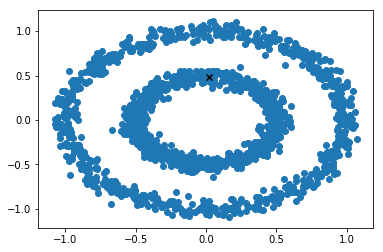

In [87]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[1131][0], X[1131, 1], marker='x', c='k')

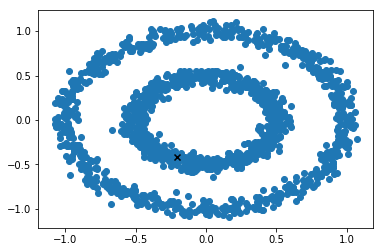

In [116]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[449][0], X[449, 1], marker='x', c='k')

In [115]:
np.exp(-(np.sort(dis, axis=1)[:, 1:175].sum(axis=1) / (75))).argmax()

449

In [106]:
np.sort(dis[0])

array([0.        , 0.01156984, 0.01305324, ..., 1.59005507, 1.61151751,
       1.63946448])

In [96]:
rho

array([12.55434702, 12.21060096,  6.0737319 , ...,  9.38016264,
        7.05789513,  8.95448124])

In [89]:
rho

array([1.33634815e-02, 1.83561924e-02, 3.65067488e-02, ...,
       1.71177570e+01, 1.72748853e+01, 1.72775898e+01])